# Red Wine Dataset Analysis - UCI

In [13]:
import numpy as np
import pandas as pd
%pylab inline
pylab.style.use('ggplot')
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
wine_data = pd.read_csv('wine.csv')

In [3]:
wine_data.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Class Imbalance Analysis

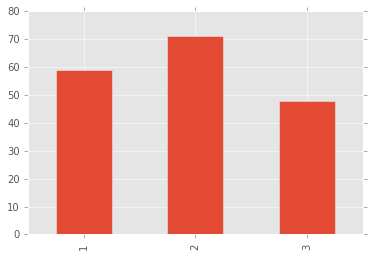

In [4]:
label_counts = wine_data.loc[:, 'Wine'].value_counts().sort_index()
label_counts.plot(kind='bar')

## Univariate Analysis

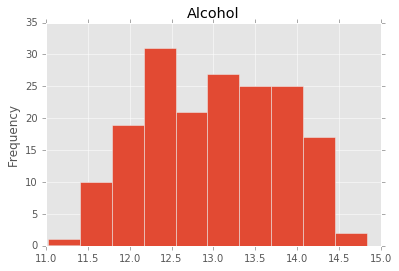

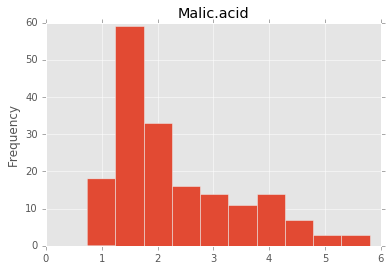

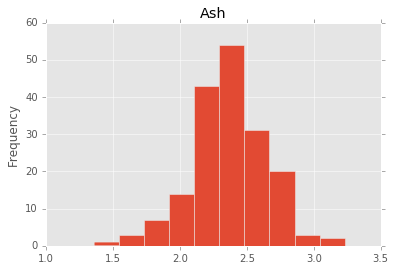

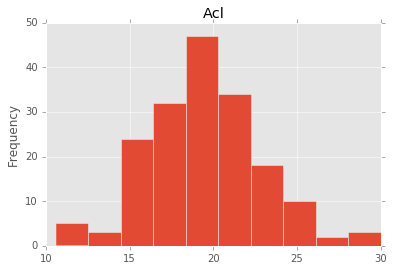

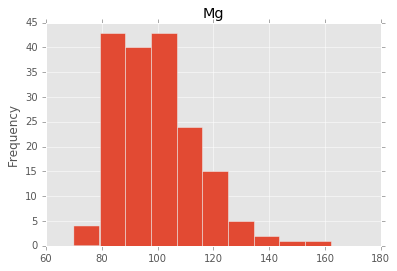

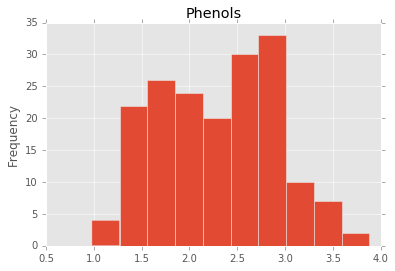

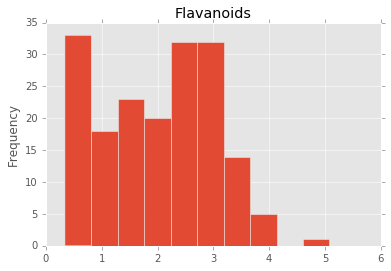

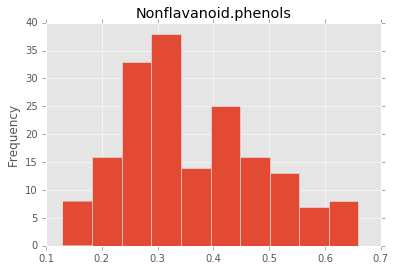

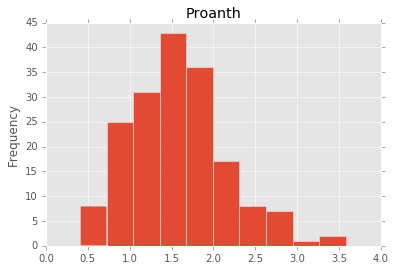

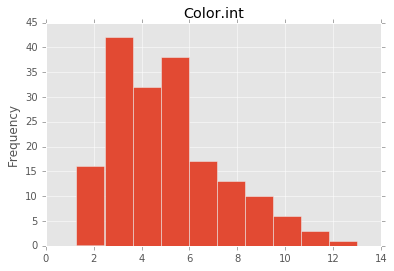

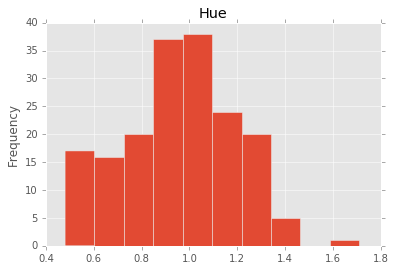

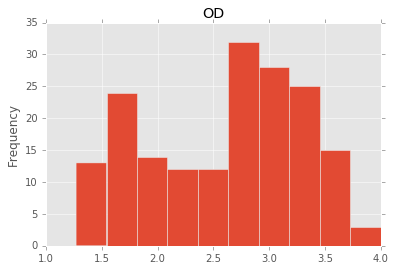

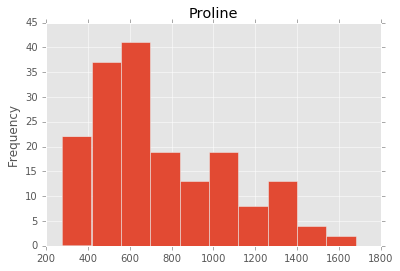

In [5]:
feature_names = wine_data.columns.drop('Wine')

for fname in feature_names:
    _ = pylab.figure()
    _ = wine_data.loc[:, fname].plot(kind='hist', title=fname)

## Bivariate Analysis: Feature Grouped By Labels

d:\Anaconda3\envs\latest\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


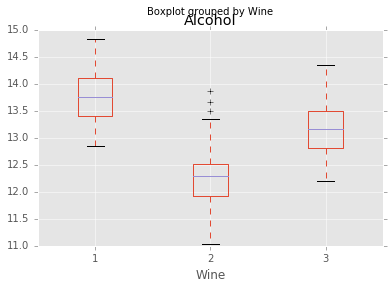

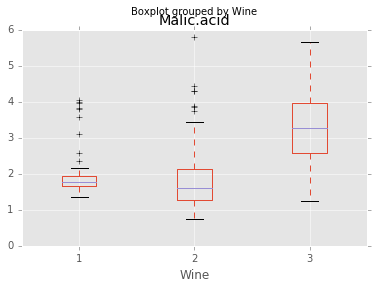

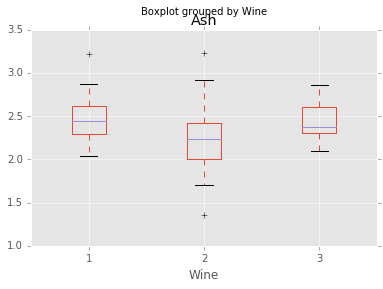

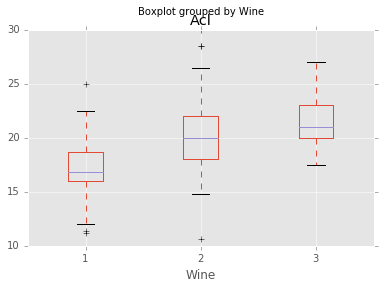

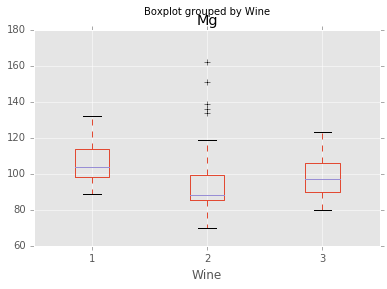

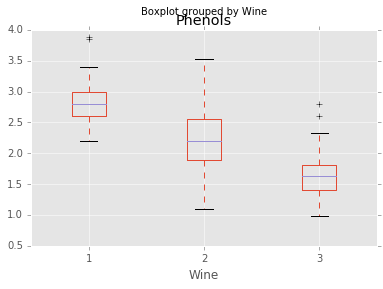

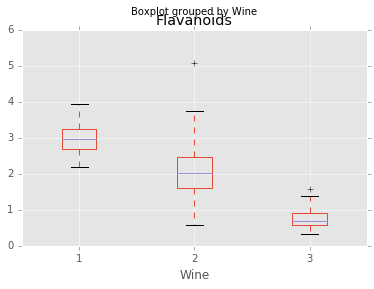

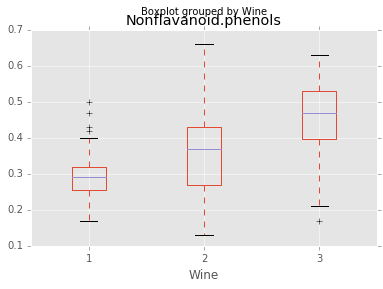

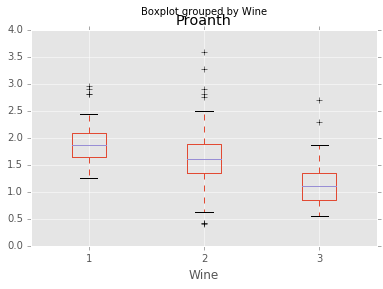

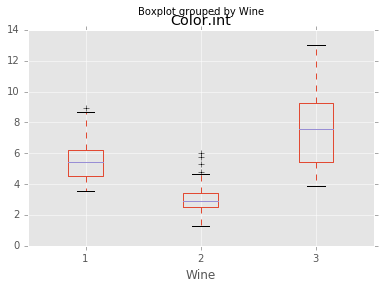

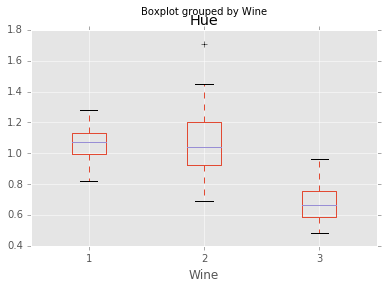

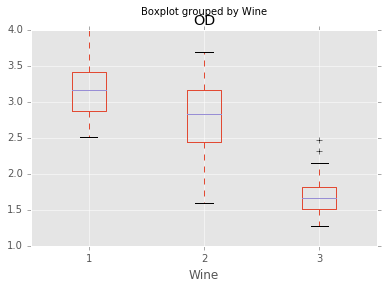

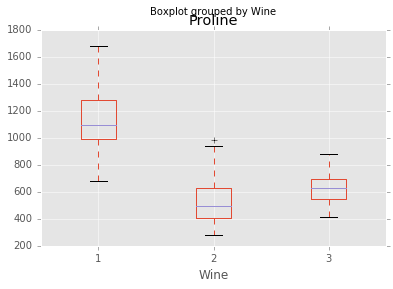

In [6]:
for fname in feature_names:
    _ = pylab.figure()
    wine_data.boxplot(column=fname, by='Wine')

## Feature Importances

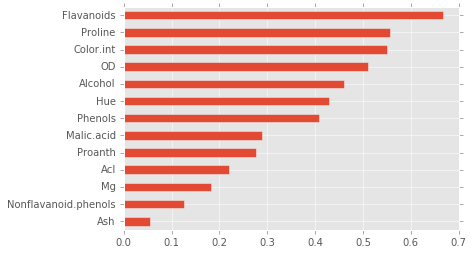

In [11]:
from sklearn.feature_selection import mutual_info_classif

mutual_info_importances = mutual_info_classif(wine_data.loc[:, feature_names], wine_data.loc[:, 'Wine'])
importances = pd.Series(mutual_info_importances, index=feature_names)

importances.sort_values(ascending=True).plot(kind='barh')

## Feature Correlations

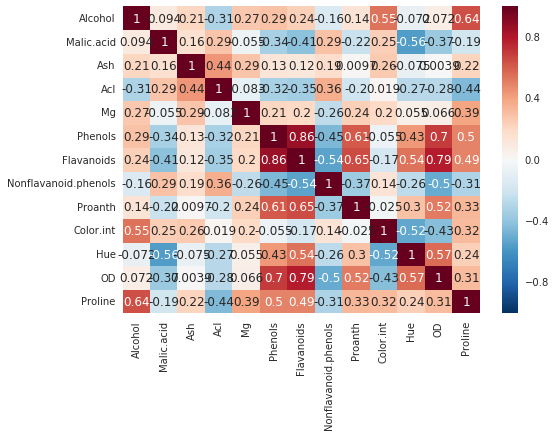

In [14]:
corrs = wine_data.loc[:, feature_names].corr()
sns.heatmap(corrs, annot=True)

## Use Naive Bayes Classifier on All Features

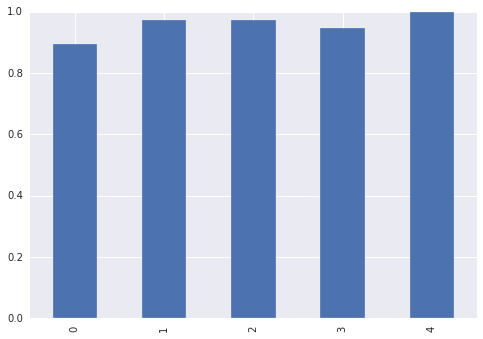

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

feature_data = wine_data.loc[:, feature_names]
label_data = wine_data.loc[:, 'Wine']
model = GaussianNB()

scores = cross_val_score(estimator=model, 
                         X=feature_data, 
                         y=label_data,
                         cv=5,
                         scoring='f1_macro'
                        )

scores = pd.Series(scores)
scores.plot(kind='bar')